Can a machine identify a b as a honey bee or a bumble bee? Honey and bumble bees have different behaviors and appearences. The identification of bees can assist in more quickly and ffectivly collecting field data. Through this quick identificaiton the prevelence and growth of the species can be better understood. This information is pivotal for ecologcal and agricultural needs.

This Blog is about loading and processing images using Pillow, a python imaging library.

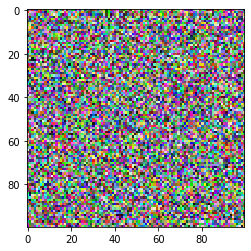

In [1]:
# Used to change filepaths
from pathlib import Path

# We set up matplotlib, pandas, and the display function
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd

# import numpy to use in this cell

import numpy as np
# import Image from PIL so we can use it later

from PIL import Image

# generate test_data

test_data = np.random.beta(1,1, size=(100,100,3))

# display the test_data

plt.imshow(test_data)

Pillow is a very flexible image loading and manipulation library. PIL can work with manny different image formats and load, display, print dimensions by pixel. 

The image size is: (100, 100)


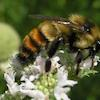

In [2]:
# open the image
img = Image.open("datasets/bee_1.png")

# Get the image size
img_size = img.size

print("The image size is: {}".format(img_size))

# Just having the image as the last line in the cell will display it in the notebook
img

Pillow has common image manipulation built in to resize, convert to other color modes, crop, rotate, and flip images. OFten times these data augmentation methods are part of a pipeline for turnign small numbers of images into mor images to crate traiing data for machine larning algorithms.

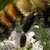

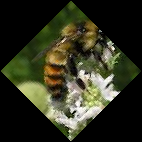

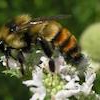

In [3]:
# Crop the image to 25, 25, 75, 75
img_cropped = img.crop(box =(25,25,75,75))
display(img_cropped)

# rotate the image by 45 degrees
img_rotated = img.rotate(45, expand=225)
display(img_rotated)

# flip the image left to right
img_flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
display(img_flipped)

Most impage formats have 3 color channels, Red, Blue, and Green. For each pixel there is a value for every channel. An image is really a 3 dimensional, the width matching the width of the image, the height matching the height of the image and a depth of 3 for the 3 color channels. The images being processed would have a shape of (100, 100, 3). 

Our NumPy array has the shape: (100, 100, 3)


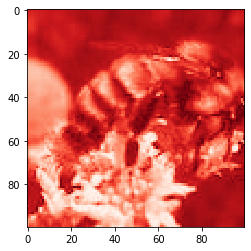

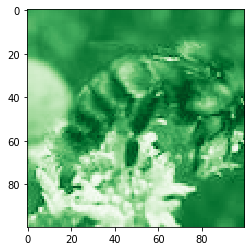

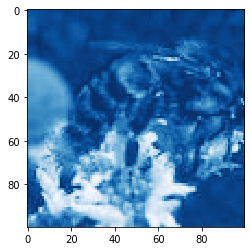

In [4]:
# Turn our image object into a NumPy array
img_data = np.array(img)

# get the shape of the resulting array
img_data_shape = img_data.shape

print("Our NumPy array has the shape: {}".format(img_data_shape))

# plot the data with `imshow` 

plt.show()

# plot the red channel
plt.imshow(img_data[:,:,0], cmap=plt.cm.Reds_r)
plt.show()

# plot the green channel
plt.imshow(img_data[:,:,1], cmap=plt.cm.Greens_r)
plt.show()

# plot the blue channel
plt.imshow(img_data[:,:,2], cmap=plt.cm.Blues_r)
plt.show()

Color channels can provide more information about an image. In order to understand how the the color chanenls differ we can examine the kernal density estimate for each color channel on the same plot.

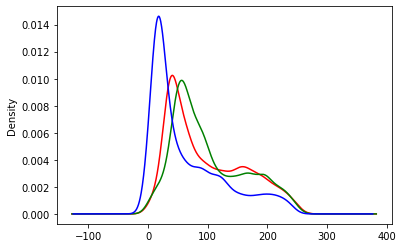

In [5]:
def plot_kde(channel, color):
    """ Plots a kernel density estimate for the given data.
        
        `channel` must be a 2d array
        `color` must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels
channels = ['r', 'g', 'b']
    
def plot_rgb(image_data):
    # use enumerate to loop over colors and indexes
    for ix, color in enumerate(channels):
        plot_kde(image_data[:,:,ix], color)
        # ... YOUR CODE FOR TASK 5 ...

    plt.show()
    
plot_rgb(img_data)

From the KDE plot we can see that the image has more green and red  than blue. Most of the pixels contain low lvel of blue.

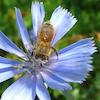

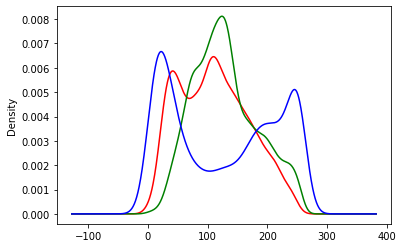

In [6]:
# load bee_12.jpg as honey
# ... YOUR CODE FOR TASK 6 ...
honey = Image.open('datasets/bee_12.png')
# display the honey bee image
display(honey)

# NumPy array of the honey bee image data
# ... YOUR CODE FOR TASK 6 ...
honey_data = np.array(honey)

# plot the rgb densities for the honey bee image
plot_rgb(honey_data)

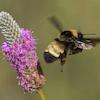

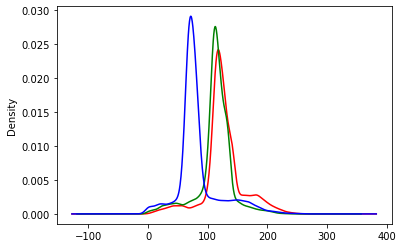

In [7]:
# load bee_3.jpg as bumble
# ... YOUR CODE FOR TASK 7 ...
bumble = Image.open('datasets/bee_3.png')
# display the bumble bee image
display(bumble)

# NumPy array of the bumble bee image data
# ... YOUR CODE FOR TASK 7 ...
bumble_data = np.array(bumble)
# plot the rgb densities for the bumble bee image
plot_rgb(bumble_data)

Comparing honey bes and bumble bees.
Som color info is useful but too much color information can be distracting. Th different flowers in the images highlight different colors that are distracting from classifying the bees in th images. Turning th imags to grayscale may give us better view for comparison purposes.

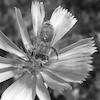

Our NumPy array has the shape: (100, 100)


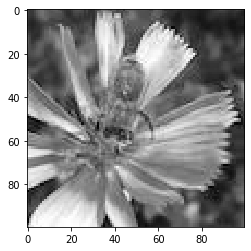

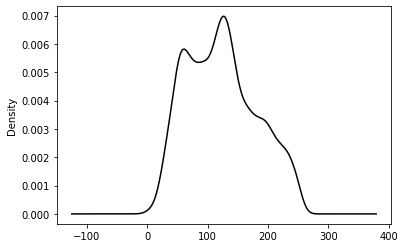

In [8]:
# convert honey to grayscale
honey_bw = honey.convert('L')
display(honey_bw)

# convert the image to a NumPy array
honey_bw_arr = np.array(honey_bw)

# get the shape of the resulting array
honey_bw_arr_shape = honey_bw_arr.shape
print("Our NumPy array has the shape: {}".format(honey_bw_arr_shape))

# plot the array using matplotlib
plt.imshow(honey_bw_arr, cmap=plt.cm.gray)
plt.show()

# plot the kde of the new black and white array
plot_kde(honey_bw_arr, 'k')

aftr converting th image to gray scal we can use th np.maximum function to increase the contrast of the image.

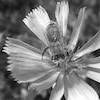

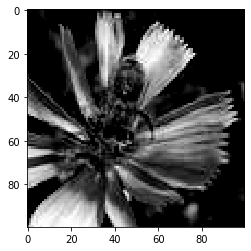

In [9]:
# flip the image left-right with transpose

honey_bw_flip = honey_bw.transpose(Image.FLIP_LEFT_RIGHT)
# show the flipped image
display(honey_bw_flip)

# save the flipped image

honey_bw_flip.save("saved_images/bw_flipped.jpg")
# create higher contrast by reducing range

honey_hc_arr = np.maximum(honey_bw_arr, 100)
# show the higher contrast version
plt.imshow(honey_hc_arr, cmap=plt.cm.gray)

# convert the NumPy array of high contrast to an Image

honey_bw_hc = Image.fromarray(honey_hc_arr)

# save the high contrast version

honey_bw_hc.save("saved_images/bw_hc.jpg")

In [10]:
image_paths = ['datasets/bee_1.png', 'datasets/bee_12.png',  'datasets/bee_3.png']

def process_image(path):
    img = Image.open(path)

    # create paths to save files to
    bw_path = "saved_images/bw_{}.jpg".format(path.stem)
    rcz_path = "saved_images/rcz_{}.jpg".format(path.stem)

    print("Creating grayscale version of {} and saving to {}.".format(path, bw_path))
    bw = img.convert("L")
    bw.save(bw_path)


    print("Creating rotated, cropped, and zoomed version of {} and saving to {}.".format(path, rcz_path))
    rcz = bw.rotate(45).crop(box =(25,25,75,75)).resize((100,100))
    rcz.save(rcz_path)


# for loop over image paths
for img_path in image_paths:
    process_image(Path(img_path))

Creating grayscale version of datasets/bee_1.png and saving to saved_images/bw_bee_1.jpg.
Creating rotated, cropped, and zoomed version of datasets/bee_1.png and saving to saved_images/rcz_bee_1.jpg.
Creating grayscale version of datasets/bee_12.png and saving to saved_images/bw_bee_12.jpg.
Creating rotated, cropped, and zoomed version of datasets/bee_12.png and saving to saved_images/rcz_bee_12.jpg.
Creating grayscale version of datasets/bee_3.png and saving to saved_images/bw_bee_3.jpg.
Creating rotated, cropped, and zoomed version of datasets/bee_3.png and saving to saved_images/rcz_bee_3.jpg.


Crating a pipeline for this process is the final goal. Once we ahv determine how w want to augment our images to create a training set we now have to create this in a pipeline to load, trnasform and save a number of images at once. 